## Interactively analysing components of rain gage data

Import the files containing all the scripts for analysing rain gage networks. In these files are definitions for three different class object: 

 - **`Rain`**: contains set of gage data or set of radar data at specified locations. 
 - **`RadarGage`**: merges a gage instance of **`Rain`** and a radar instance of **`Rain`** to facilitate comparisons
 - **`Event`**: contains data from specific times to facilitate mapping and other spatial analysis

In [1]:
%matplotlib inline
from rain import *

#### Charlotte:

Initialize the **`Rain`** object with a file containing all of the data or with a list of years. The output from this are all contained in attributed of the ** `Rain`** class. All of the data are contained in a **`pandas.DataFrame`** object called **`Rain.df`**

In [2]:
path = './input/CHARLOTTE/'

rg = Rain(path=path, name='Charlotte_CRN_gage_{YEAR}.csv', year=range(2001, 2016), ngages=71, freq='15min')
rg.ll_file = 'Charlotte_CRN_lat_lon.csv'
rg.get_ll(cols=['lat','lon'])

Check the following attributes carefully:
 
save_path = 
per_hour = 4
year = 2001-2015
units = mm
path = ./input/CHARLOTTE/
freq = 15min
ngages = 71
name = Charlotte_CRN_gage_2015.csv


In [350]:
np.diff(np.array([1, 2, 5, 6, 7, 20]))

array([ 1,  3,  1,  1, 13])

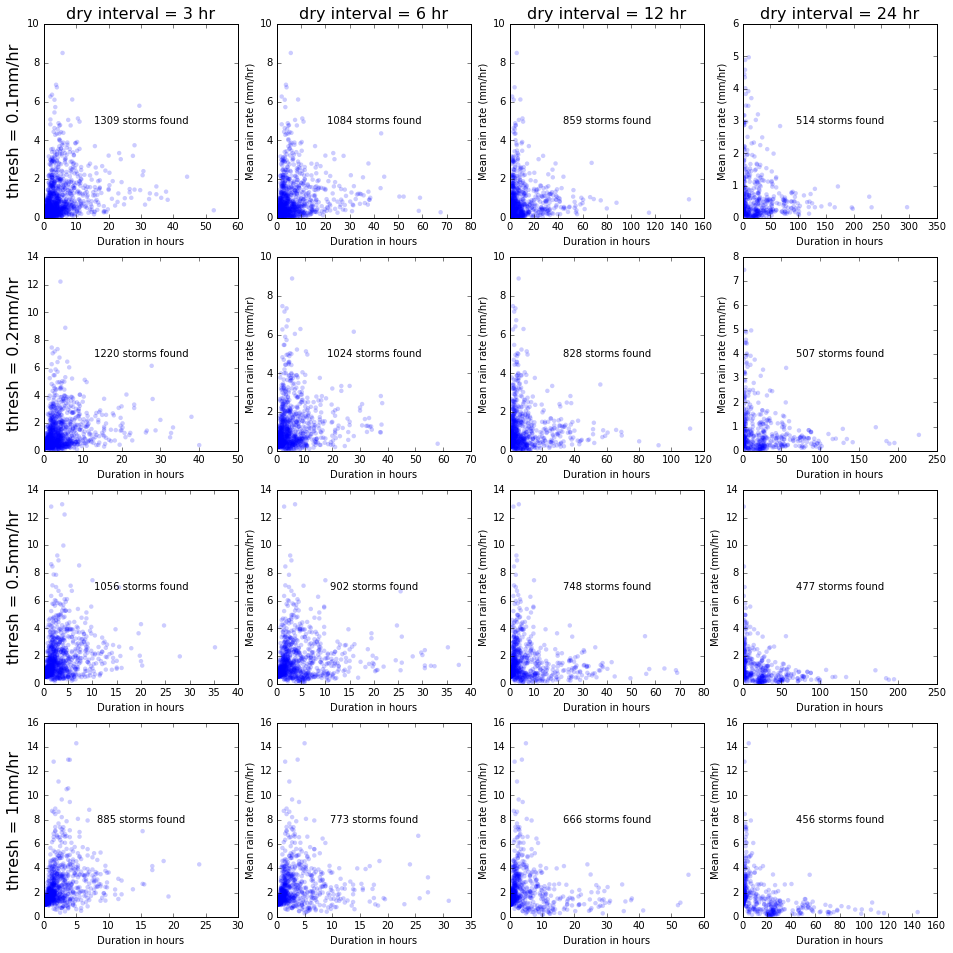

In [41]:
thresh = .5
dry_interval = 6
n=1
plt.figure(figsize=(16,16))
for thresh in [.1,.2,.5,1]:
    for dry_interval in [3,6,12,24]:
        
        rate = rg.rate.mean(axis=1)
        wet_times = rate[rate>=thresh].index
        #dry_times = rate[rate<thresh].index

        #time_until_dry = np.diff(dry_times).astype(int)/(1000000000*60)
        # storms have to be wet for at least an hour
        #storms = rate[rate<thresh][0:-1][time_until_dry>=(60*1)]

        time_until_wet = np.diff(wet_times).astype(int)/(1000000000*60)
        # there have to be at least dry_interval dry hours between storms
        ends = rate[rate>thresh][0:-1][time_until_wet>=(60*dry_interval)]
        starts = rate[rate>thresh][1:][time_until_wet>=(60*dry_interval)]

        starts = starts[0:-1]
        ends = ends[1:]

        wet_sum = [rate[rate>thresh][starts.index[i]:ends.index[i]].sum() for i in range(starts.shape[0])]
        all_mean = [rate[starts.index[i]:ends.index[i]].mean() for i in range(starts.shape[0])]
        count = [rate[starts.index[i]:ends.index[i]].count()/4. for i in range(starts.shape[0])]
        df = pd.DataFrame(np.array([count, wet_sum, all_mean]).T, index=list(starts.index), 
                          columns=['count', 'wet_sum', 'all_mean'])
        warm = df[(df.index.month >4) & (df.index.month <10)]

        ax = plt.subplot(4,4,n)
        ax.scatter(y=warm['all_mean'], x=warm['count'], alpha=.2, edgecolors='None')
        if n < 5:
            ax.set_title('dry interval = {di} hr'.format(di=dry_interval), fontsize=16)
        s = '{n} storms found'.format(n=warm.shape[0])
        ax.text(0.5, 0.5,s, horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        if (n-1)%4 == 0:
            ax.set_ylabel('thresh = {thresh}mm/hr'.format(thresh=thresh), fontsize=16)
        else:
            ax.set_ylabel('Mean rain rate (mm/hr)')
        ax.set_xlabel('Duration in hours')

        ax.set_xlim(0,)
        ax.set_ylim(0,)
        n+=1
plt.savefig('/home/jsignell/Paper/Notebooks/output/Choose storms.png')

In [ ]:
thresh = .5
dry_interval = 6

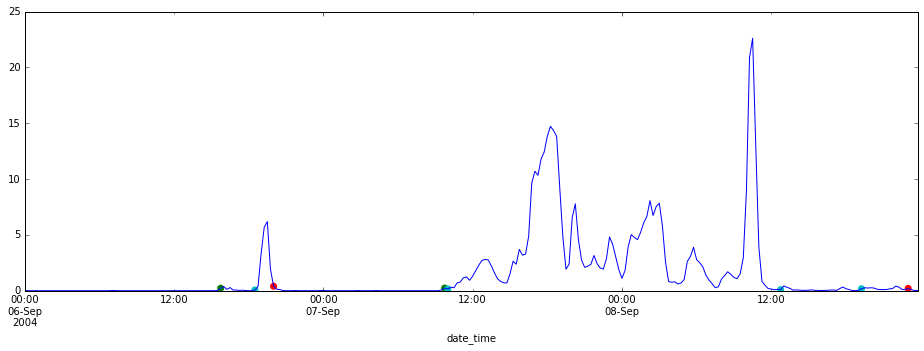

In [371]:
rate['2004-09-06':'2004-09-08'].plot(figsize=(16,5))
plt.scatter(x=ends.index, y=ends.values, c='red', edgecolor='None', s=50)
plt.scatter(x=starts.index, y=starts.values, c='green', edgecolor='None', s=50)
plt.scatter(x=storms.index, y=storms.values, c='c', edgecolor='None', s=50)
plt.ylim(0,);